<a href="https://colab.research.google.com/github/maleal2/Fitness_Tracker_wearable_device_project_Group_1/blob/main/Fitness_Tracker_wearable_device_project_Group_1_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [129]:
# Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#suppress scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [274]:
# Loading additional libraries.
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, recall_score, precision_score, mean_squared_error
from sklearn.model_selection import train_test_split
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM , Activation
from keras.utils import pad_sequences
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#!pip install tsfresh # This is for installing tsfresh utilities.

In [280]:
# Additional Libraries
from tsfresh import utilities
import tsfresh.utilities as utilities
from sklearn.metrics import r2_score

## Loading and importing datasets of : Daily activity, Calories per hour, intensity activities, slee time per day, and weight information.

In [131]:
# Importing and loading DailyActivity data into variable : df_dly_activity.
df_dly_activity = pd.read_csv('/content/sample_data/dailyActivity_merged.csv', sep =',')
# Importing and loading calories per hour into variable : df_calories.
df_calories = pd.read_csv('/content/sample_data/hourlyCalories_merged.csv', sep =',')
# Importing and loading Intensity activities per hour into variable: df_intensity
df_intensity = pd.read_csv('/content/sample_data/hourlyIntensities_merged.csv', sep =',')
# Importing and loading sleep time into variable: df_sleep
df_sleep = pd.read_csv('/content/sample_data/sleepDay_merged.csv', sep =',')
# Importing and loading weight into variable: df_weight
df_weight = pd.read_csv('/content/sample_data/weightLogInfo_merged.csv', sep =',')
# Importing and loading calories per minute into variable : df_calories_min.
df_calorie_min = pd.read_csv('/content/sample_data/minuteCaloriesNarrow_merged.csv', sep =',')
# Importing and loading Intensity activities per minute into variable: df_intensity_min
df_intensity_min = pd.read_csv('/content/sample_data/minuteIntensitiesNarrow_merged.csv', sep =',')
# Importing and loading sleep time per minute into variable: df_sleep_min
df_sleep_min = pd.read_csv('/content/sample_data/minuteStepsNarrow_merged.csv', sep =',')

## Processing and cleaning data.

### Checking for emtpy Data in each of the files.

<Axes: >

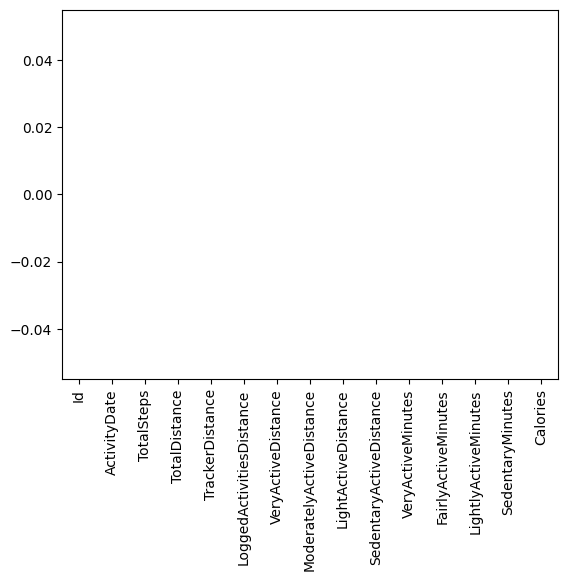

In [132]:
# There is no missing data in the file : dailyActivity.
df_dly_activity.isna().sum().plot.bar()

<Axes: >

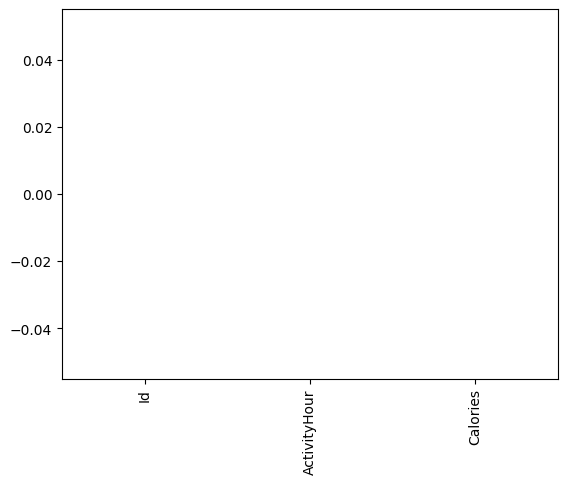

In [133]:
# There is no missing data in the file : calories.
df_calories.isna().sum().plot.bar()

<Axes: >

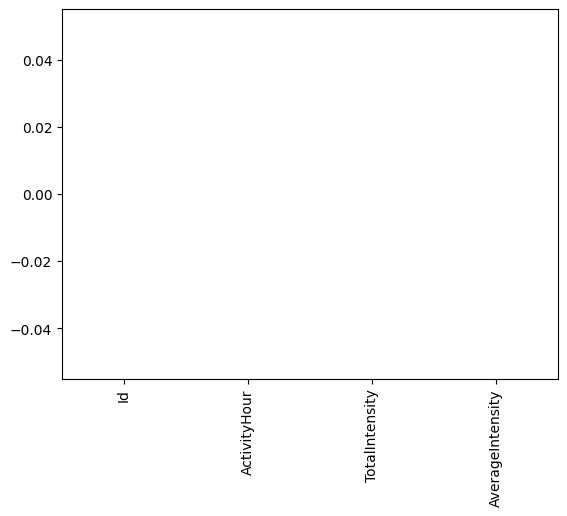

In [134]:
# There is no missing data in the file : intensity.
df_intensity.isna().sum().plot.bar()

<Axes: >

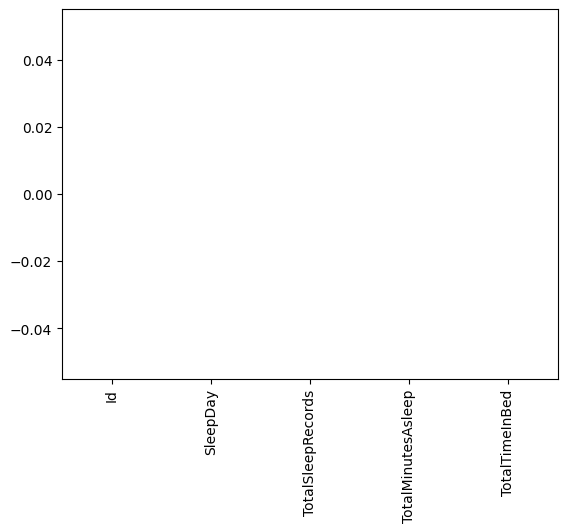

In [135]:
# There is no missing data in the file : sleep.
df_sleep.isna().sum().plot.bar()

<Axes: >

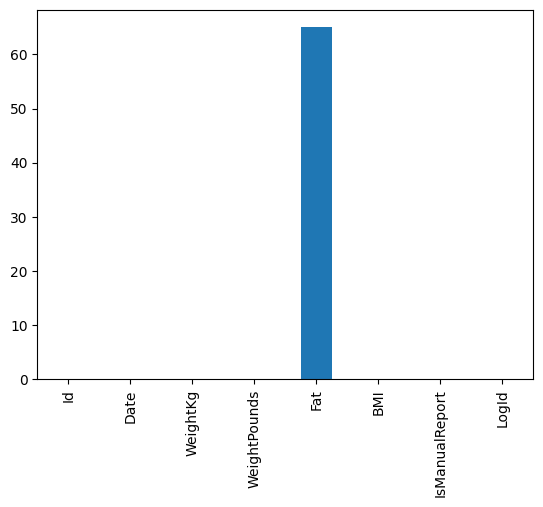

In [136]:
# There is  missing data in the file : weight.
df_weight.isna().sum().plot.bar()

<Axes: >

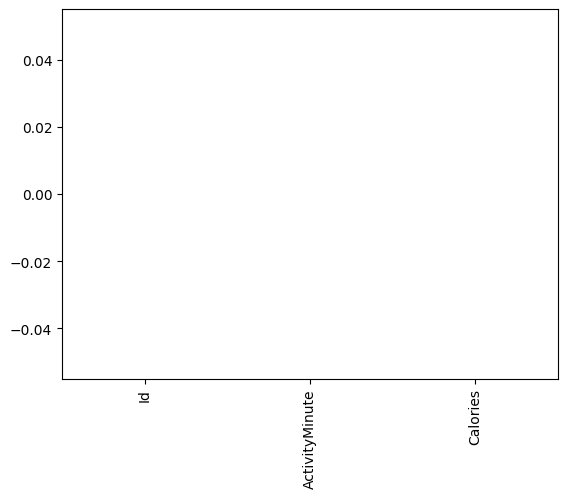

In [137]:
# There is  no issing data in the file : calories per minute.
df_calorie_min.isna().sum().plot.bar()

<Axes: >

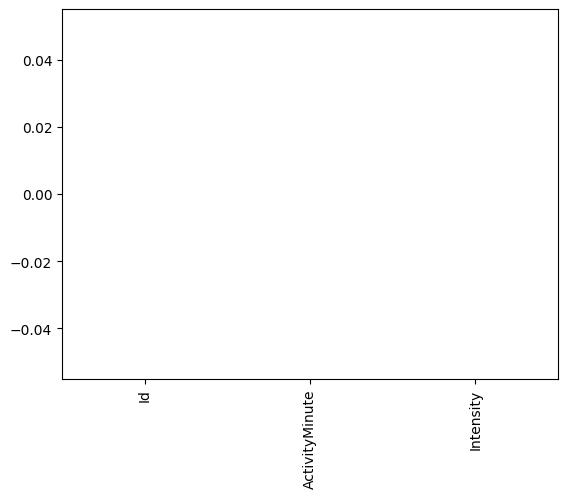

In [138]:
# There is no  missing data in the file : internsity per minutes .
df_intensity_min.isna().sum().plot.bar()

<Axes: >

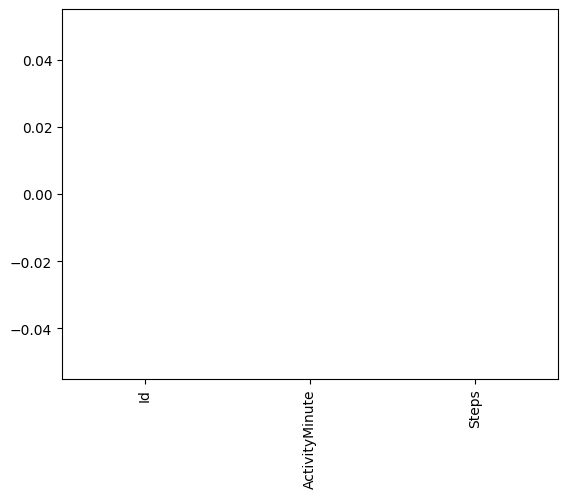

In [139]:
# There is no  missing data in the file : sleep per minute.
df_sleep_min.isna().sum().plot.bar()

### Displaying a summary of the data and verifying dtypes.

In [160]:
df_dly_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50000,8.50000,0.00000,1.88000,0.55000,6.06000,0.00000,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97000,6.97000,0.00000,1.57000,0.69000,4.71000,0.00000,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74000,6.74000,0.00000,2.44000,0.40000,3.91000,0.00000,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28000,6.28000,0.00000,2.14000,1.26000,2.83000,0.00000,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16000,8.16000,0.00000,2.71000,0.41000,5.04000,0.00000,36,10,221,773,1863


In [161]:
df_dly_activity.info()  # Checking the Dtypes of each variables in the daily activity. We need to convert "ActivityDate" into "Datetime" dtype.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [162]:
df_calories.head()

,Id,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


In [163]:
df_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   Calories      22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [164]:
df_intensity.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,20,0.33333
1,1503960366,2016-04-12 01:00:00,8,0.13333
2,1503960366,2016-04-12 02:00:00,7,0.11667
3,1503960366,2016-04-12 03:00:00,0,0.00000
4,1503960366,2016-04-12 04:00:00,0,0.00000


In [165]:
df_intensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   TotalIntensity    22099 non-null  int64         
 3   AverageIntensity  22099 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 690.7 KB


In [166]:
df_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [167]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [168]:
df_weight.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.60000,115.96315,22.00000,22.65000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.60000,115.96315,NaN,22.65000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.50000,294.31712,NaN,47.54000,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.70000,125.00210,NaN,21.45000,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.30000,126.32487,NaN,21.69000,True,1463097599000


In [169]:
df_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   Fat             2 non-null      float64       
 5   BMI             67 non-null     float64       
 6   IsManualReport  67 non-null     bool          
 7   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 3.9 KB


In [198]:
df_calorie_min.head()

,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.78650
1,1503960366,4/12/2016 12:01:00 AM,0.78650
2,1503960366,4/12/2016 12:02:00 AM,0.78650
3,1503960366,4/12/2016 12:03:00 AM,0.78650
4,1503960366,4/12/2016 12:04:00 AM,0.78650


In [199]:
df_calorie_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Id              1325580 non-null  int64  
 1   ActivityMinute  1325580 non-null  object 
 2   Calories        1325580 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.3+ MB


In [200]:
df_intensity_min.head()

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [201]:
df_intensity_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Intensity       1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [202]:
df_sleep_min.head()

,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0
2,1503960366,4/12/2016 12:02:00 AM,0
3,1503960366,4/12/2016 12:03:00 AM,0
4,1503960366,4/12/2016 12:04:00 AM,0


In [203]:
df_sleep_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Steps           1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


### Converting Dates variables for each of the csv previously imported into the right format.

In [170]:
df_dly_activity['ActivityDate'] = pd.to_datetime(df_dly_activity['ActivityDate'])
df_dly_activity.info()  # Verifying conversion.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [171]:
df_dly_activity.head() #Displaying new format.

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50000,8.50000,0.00000,1.88000,0.55000,6.06000,0.00000,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97000,6.97000,0.00000,1.57000,0.69000,4.71000,0.00000,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74000,6.74000,0.00000,2.44000,0.40000,3.91000,0.00000,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28000,6.28000,0.00000,2.14000,1.26000,2.83000,0.00000,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16000,8.16000,0.00000,2.71000,0.41000,5.04000,0.00000,36,10,221,773,1863


In [172]:
# Repeating the same steps with calories. Converting "ActivityHour" into datatime dtype.
df_calories['ActivityHour'] = pd.to_datetime(df_calories['ActivityHour'])
df_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   Calories      22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [173]:
df_calories.head() #Displaying new format.

,Id,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


In [174]:
# Repeating the same steps with intensity. Converting "ActivityHour" into datatime dtype.
df_intensity['ActivityHour'] = pd.to_datetime(df_intensity['ActivityHour'])
df_intensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   TotalIntensity    22099 non-null  int64         
 3   AverageIntensity  22099 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 690.7 KB


In [175]:
df_intensity.head() #Displaying new format.

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,20,0.33333
1,1503960366,2016-04-12 01:00:00,8,0.13333
2,1503960366,2016-04-12 02:00:00,7,0.11667
3,1503960366,2016-04-12 03:00:00,0,0.00000
4,1503960366,2016-04-12 04:00:00,0,0.00000


In [176]:
# Repeating the same steps with sleep. Converting "SleepDay" into datatime dtype.
df_sleep['SleepDay'] = pd.to_datetime(df_sleep['SleepDay'])
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [177]:
df_sleep.head() #Displaying new format.

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [178]:
# Repeating the same steps with weight. Converting "Date" into datatime dtype.
df_weight['Date'] = pd.to_datetime(df_weight['Date'])
df_weight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              67 non-null     int64         
 1   Date            67 non-null     datetime64[ns]
 2   WeightKg        67 non-null     float64       
 3   WeightPounds    67 non-null     float64       
 4   Fat             2 non-null      float64       
 5   BMI             67 non-null     float64       
 6   IsManualReport  67 non-null     bool          
 7   LogId           67 non-null     int64         
dtypes: bool(1), datetime64[ns](1), float64(4), int64(2)
memory usage: 3.9 KB


In [179]:
df_weight.head() #Displaying new format.

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-05-02 23:59:59,52.60000,115.96315,22.00000,22.65000,True,1462233599000
1,1503960366,2016-05-03 23:59:59,52.60000,115.96315,NaN,22.65000,True,1462319999000
2,1927972279,2016-04-13 01:08:52,133.50000,294.31712,NaN,47.54000,False,1460509732000
3,2873212765,2016-04-21 23:59:59,56.70000,125.00210,NaN,21.45000,True,1461283199000
4,2873212765,2016-05-12 23:59:59,57.30000,126.32487,NaN,21.69000,True,1463097599000


In [204]:
# Repeating the same steps with calories per minute. Converting "ActivityMinute" into datatime dtype.
df_calorie_min['ActivityMinute'] = pd.to_datetime(df_calorie_min['ActivityMinute'])
df_calorie_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Id              1325580 non-null  int64         
 1   ActivityMinute  1325580 non-null  datetime64[ns]
 2   Calories        1325580 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 30.3 MB


In [205]:
# Repeating the same steps with intensity per minute. Converting "ActivityMinute" into datatime dtype.
df_intensity_min['ActivityMinute'] = pd.to_datetime(df_intensity_min['ActivityMinute'])
df_intensity_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Id              1325580 non-null  int64         
 1   ActivityMinute  1325580 non-null  datetime64[ns]
 2   Intensity       1325580 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 30.3 MB


In [206]:
# Repeating the same steps with sleep per minute. Converting "ActivityMinute" into datatime dtype.
df_sleep_min['ActivityMinute'] = pd.to_datetime(df_sleep_min['ActivityMinute'])
df_sleep_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Id              1325580 non-null  int64         
 1   ActivityMinute  1325580 non-null  datetime64[ns]
 2   Steps           1325580 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 30.3 MB


### Checking for the number of unique IDs per dataset previously imported.

In [180]:
df_dly_activity['Id'].nunique()

33

In [181]:
df_calories['Id'].nunique()

33

In [182]:
df_intensity['Id'].nunique()

33

In [183]:
df_sleep['Id'].nunique()

24

In [184]:
df_weight['Id'].nunique()

8

- Note: there is a low adherance to monitoring and recording weight and body mass index (IBM). We will not use the weight dataframe previous imported as first recommendation, suggesting weight monitoring and setting goalds for users to obtain the ideal IBM.

In [207]:
df_calorie_min['Id'].nunique()

33

In [208]:
df_intensity_min['Id'].nunique()

33

In [209]:
df_sleep_min['Id'].nunique()

33

### Analysis of data insights.

In [185]:
df_dly_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000,940.00000
mean,4855407369.33298,7637.91064,5.48970,5.47535,0.10817,1.50268,0.56754,3.34082,0.00161,21.16489,13.56489,192.81277,991.21064,2303.60957
std,2424805475.65796,5087.15074,3.92461,3.90728,0.61990,2.65894,0.88358,2.04066,0.00735,32.84480,19.98740,109.17470,301.26744,718.16686
min,1503960366.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,2320127002.00000,3789.75000,2.62000,2.62000,0.00000,0.00000,0.00000,1.94500,0.00000,0.00000,0.00000,127.00000,729.75000,1828.50000
50%,4445114986.00000,7405.50000,5.24500,5.24500,0.00000,0.21000,0.24000,3.36500,0.00000,4.00000,6.00000,199.00000,1057.50000,2134.00000
75%,6962181067.00000,10727.00000,7.71250,7.71000,0.00000,2.05250,0.80000,4.78250,0.00000,32.00000,19.00000,264.00000,1229.50000,2793.25000
max,8877689391.00000,36019.00000,28.03000,28.03000,4.94214,21.92000,6.48000,10.71000,0.11000,210.00000,143.00000,518.00000,1440.00000,4900.00000


In [186]:
df_calories.describe()

,Id,Calories
count,22099.00000,22099.00000
mean,4848235270.21770,97.38676
std,2422500401.42259,60.70262
min,1503960366.00000,42.00000
25%,2320127002.00000,63.00000
50%,4445114986.00000,83.00000
75%,6962181067.00000,108.00000
max,8877689391.00000,948.00000


In [187]:
df_intensity.describe()

,Id,TotalIntensity,AverageIntensity
count,22099.00000,22099.00000,22099.00000
mean,4848235270.21770,12.03534,0.20059
std,2422500401.42259,21.13311,0.35222
min,1503960366.00000,0.00000,0.00000
25%,2320127002.00000,0.00000,0.00000
50%,4445114986.00000,3.00000,0.05000
75%,6962181067.00000,16.00000,0.26667
max,8877689391.00000,180.00000,3.00000


In [188]:
df_sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,413.00000,413.00000,413.00000,413.00000
mean,5000979403.21307,1.11864,419.46731,458.63923
std,2060360173.74404,0.34552,118.34468,127.10161
min,1503960366.00000,1.00000,58.00000,61.00000
25%,3977333714.00000,1.00000,361.00000,403.00000
50%,4702921684.00000,1.00000,433.00000,463.00000
75%,6962181067.00000,1.00000,490.00000,526.00000
max,8792009665.00000,3.00000,796.00000,961.00000


In [189]:
df_weight.describe()

,Id,WeightKg,WeightPounds,Fat,BMI,LogId
count,67.00000,67.00000,67.00000,2.00000,67.00000,67.00000
mean,7009282134.65672,72.03582,158.81180,23.50000,25.18522,1461771594283.58203
std,1950321943.91520,13.92321,30.69542,2.12132,3.06696,782994783.60925
min,1503960366.00000,52.60000,115.96315,22.00000,21.45000,1460443631000.00000
25%,6962181067.00000,61.40000,135.36383,22.75000,23.96000,1461079185000.00000
50%,6962181067.00000,62.50000,137.78891,23.50000,24.39000,1461801599000.00000
75%,8877689391.00000,85.05000,187.50315,24.25000,25.56000,1462375450500.00000
max,8877689391.00000,133.50000,294.31712,25.00000,47.54000,1463097599000.00000


- Analysis conclusions per the previous findings:

 -- In the daily activity data, we can see that mean of the total steps are: 7637.91064	or an approx of : 7638. Accordingly with the article : Intesity With Cancer and Cardiovascular Disease Incidence and Mortality and All- Cause Mortality ( Del Pozo Cruz, B. 2022), published at National Library of Medicine (https://pubmed.ncbi.nlm.nih.gov/36094529/). The total recommended steps per day are: 10,000 steps that is associated with a lower risk of mortality and cancer and CVD (Cardiovascular ) incidences. This can be another recommendation that can be used to encourange to users to achive a daily goal.
 -- Additionaly, we can see that the activity of "high sedentary periods" has the highest results with an average of 16 hours ( 991.21064  minutees to hours = 15.52 hours ), and most of the activities are reflected to the (LightActiveDistance) or low intensity activities.

 -- On the Sleep side, users are close to the average sleep rate of a total 7 hours ( 419.46731 minutes  = 6.991122 ) , which is ideal accordinly with the CDC (https://www.cdc.gov/sleep/about_sleep/how_much_sleep.html ) for Adults of 18 to 60 years old.



### Analysis graphs and plots. ( Intensity Activity vs SleepTime , Intensity activity vs Burtn Calories ).

In [190]:
# For analyzing peak times of activities. It  is necessary to separate the times of the dates into intensity.
df_intensity['Data'] = df_intensity['ActivityHour'].dt.date
df_intensity['Hour'] = df_intensity['ActivityHour'].dt.time
df_intensity.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity,Data,Hour
0,1503960366,2016-04-12 00:00:00,20,0.33333,2016-04-12,00:00:00
1,1503960366,2016-04-12 01:00:00,8,0.13333,2016-04-12,01:00:00
2,1503960366,2016-04-12 02:00:00,7,0.11667,2016-04-12,02:00:00
3,1503960366,2016-04-12 03:00:00,0,0.00000,2016-04-12,03:00:00
4,1503960366,2016-04-12 04:00:00,0,0.00000,2016-04-12,04:00:00


In [191]:
# For creating some visualizations, we are going to join daily activity and sleep dataframes.
# To do this , we are going to change the names of the columns relating to the dates in both datasets.
df_dly_activity.rename(columns={'ActivityDate': 'Date'}, inplace=True)
df_sleep.rename(columns={'SleepDay': 'Date'}, inplace=True)

In [192]:
# Joining both datasets in one file.
complete_data = pd.merge(df_dly_activity, df_sleep, on=('Id', 'Date'), how='inner')
complete_data.head()

,Id,Date,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50000,8.50000,0.00000,1.88000,0.55000,6.06000,0.00000,25,13,328,728,1985,1,327,346
1,1503960366,2016-04-13,10735,6.97000,6.97000,0.00000,1.57000,0.69000,4.71000,0.00000,21,19,217,776,1797,2,384,407
2,1503960366,2016-04-15,9762,6.28000,6.28000,0.00000,2.14000,1.26000,2.83000,0.00000,29,34,209,726,1745,1,412,442
3,1503960366,2016-04-16,12669,8.16000,8.16000,0.00000,2.71000,0.41000,5.04000,0.00000,36,10,221,773,1863,2,340,367
4,1503960366,2016-04-17,9705,6.48000,6.48000,0.00000,3.19000,0.78000,2.51000,0.00000,38,20,164,539,1728,1,700,712


In [193]:
complete_data.dtypes

Id                                   int64
Date                        datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
TotalSleepRecords                    int64
TotalMinutesAsleep                   int64
TotalTimeInBed                       int64
dtype: object

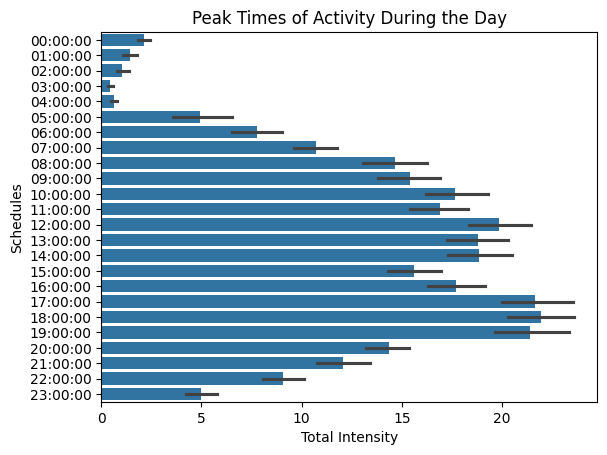

In [194]:
# Displaying peak times of activity during the day with bar charts.
sns.barplot(data=df_intensity, x='TotalIntensity', y='Hour')
plt.title('Peak Times of Activity During the Day')
plt.xlabel('Total Intensity')
plt.ylabel('Schedules')
plt.show()

- Note: from the following graph, we can see times of 5pm o 6pm there is a maximum of Total Intensity activity of 30 minutes.  This can be a useful "tip" for the app to recommend the users to reach a maximum of 30 minutes of daily target as  a moderate physical activity.

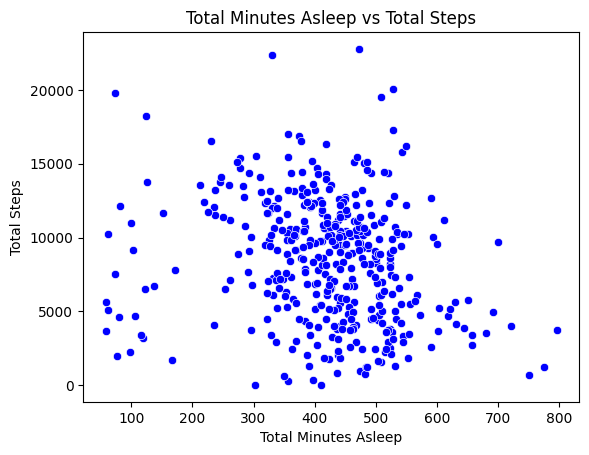

In [195]:
# Let's use Scatterplots.
sns.scatterplot(data=complete_data, x='TotalMinutesAsleep', y='TotalSteps', color ='blue')
plt.title('Total Minutes Asleep vs Total Steps')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Total Steps')
plt.show()

 - Note: from the previous scatterplot, we can identify a relationship between the 10,000 steps and the quality of the sleep time. In this case, a range from 400 to 500 minutes ( 7 to 8 hours ) are concentrated in the of 10,000 steps as the recommended target threshold.

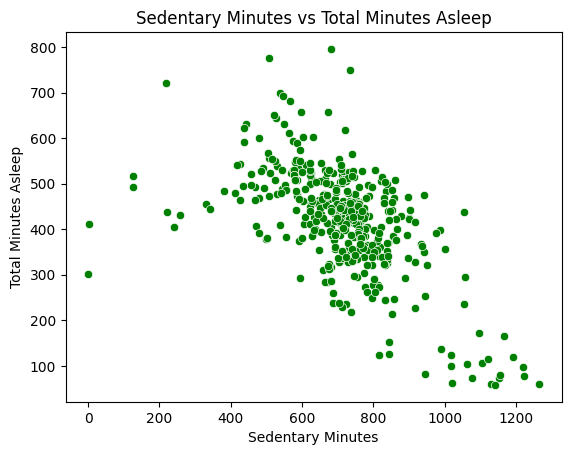

In [196]:
sns.scatterplot(data=complete_data, x='SedentaryMinutes', y='TotalMinutesAsleep', color ='green')
plt.title('Sedentary Minutes vs Total Minutes Asleep')
plt.xlabel('Sedentary Minutes')
plt.ylabel('Total Minutes Asleep')
plt.show()


- Note: there  is a relationship between low sedentary minutes (activities) and the low quality of sleep. As we can see a range of 400 to 800 minutes (6 to 13 hours )  of sedentary activity and 300 to 500 minutes (5 to 8 hours )  as total sleep time.  

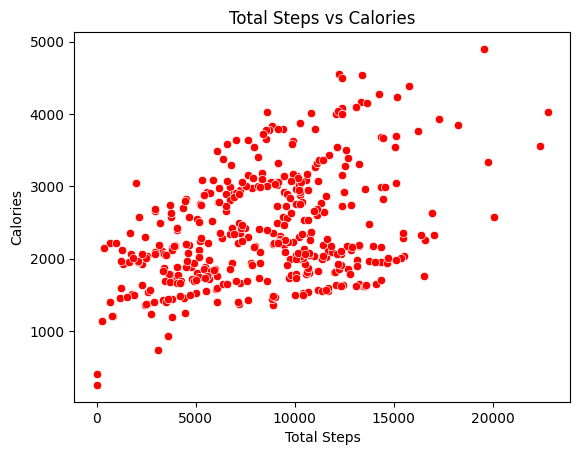

In [197]:
sns.scatterplot(data=complete_data, x='TotalSteps', y='Calories', color ='red')
plt.title('Total Steps vs Calories')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.show()

- Note: there is also a relationship between the daily total steps and the burnt calories.

# Summary of Analysis of the Descriptive Statistics and future App recommendation:

After completing the descriptive statistical analysis and creating various graphs, there are some strategies that can contribute to the marketing of the Vitality Fitness Tracker Pro:

- This device can complement a public routine, primarily focusing on monitoring and providing guidance for daily health benefits.

- It can be positioned as an ally for improving health, offering comprehensive tracking of steps, physical activity, hydration, and sleep.

- During the data registration process, it can notify users to input information such as steps, height, and age. This information can be used to establish objectives for hydration, daily calorie consumption, and physical activity, thereby improving the accuracy of the data.

- Another objective could be a fixed target of 10,000 steps per day and 30 minutes of moderate physical activity. Users can be encouraged to achieve this target through notifications, especially during previously observed peak times for moderate physical activity.

- The app can monitor excessive sedentary activity through notifications and alert users to reduce periods of inactivity.

# Analyzing data for Machine Learning.

In [ ]:
# For Machine Learning learning, we are going to use the datasets from df_calorie_min, df_intensity_min, and df_sleep_min, since it contains a total of 1325580 entries
# That we will be using for training.

In [224]:
# For analyzing the peak times of activities. It is necessary to seperate the times of the date into intensity.
df_intensity_min['Data'] = df_intensity_min['ActivityMinute'].dt.date
df_intensity_min['Minutes'] = df_intensity_min['ActivityMinute'].dt.time

In [225]:
df_intensity_min.head() # Displaying Data.

,Id,ActivityMinute,Intensity,Data,Minutes
0,1503960366,2016-04-12 00:00:00,0,2016-04-12,00:00:00
1,1503960366,2016-04-12 00:01:00,0,2016-04-12,00:01:00
2,1503960366,2016-04-12 00:02:00,0,2016-04-12,00:02:00
3,1503960366,2016-04-12 00:03:00,0,2016-04-12,00:03:00
4,1503960366,2016-04-12 00:04:00,0,2016-04-12,00:04:00


In [226]:
# For analyzing the peak times of calories. It is necessary to seperate the times of the date into calories.
df_calorie_min['Data'] = df_calorie_min['ActivityMinute'].dt.date
df_calorie_min['Minutes'] = df_calorie_min['ActivityMinute'].dt.time

In [227]:
df_calorie_min.head() # Displaying Data.

,Id,ActivityMinute,Calories,Data,Minutes
0,1503960366,2016-04-12 00:00:00,0.78650,2016-04-12,00:00:00
1,1503960366,2016-04-12 00:01:00,0.78650,2016-04-12,00:01:00
2,1503960366,2016-04-12 00:02:00,0.78650,2016-04-12,00:02:00
3,1503960366,2016-04-12 00:03:00,0.78650,2016-04-12,00:03:00
4,1503960366,2016-04-12 00:04:00,0.78650,2016-04-12,00:04:00


In [228]:
# For analyzing the peak times of sleep. It is necessary to seperate the times of the date into sleep.
df_sleep_min['Data'] = df_sleep_min['ActivityMinute'].dt.date
df_sleep_min['Minutes'] = df_sleep_min['ActivityMinute'].dt.time

In [229]:
df_sleep_min.head() # Displaying Data.

,Id,ActivityMinute,Steps,Data,Minutes
0,1503960366,2016-04-12 00:00:00,0,2016-04-12,00:00:00
1,1503960366,2016-04-12 00:01:00,0,2016-04-12,00:01:00
2,1503960366,2016-04-12 00:02:00,0,2016-04-12,00:02:00
3,1503960366,2016-04-12 00:03:00,0,2016-04-12,00:03:00
4,1503960366,2016-04-12 00:04:00,0,2016-04-12,00:04:00


In [ ]:
# Now, we are going to change the names of the columns relating to the dates for all datasets.

In [230]:
df_sleep_min.rename(columns={'ActivityMinute': 'Date'}, inplace=True)

In [231]:
df_sleep_min.head()

,Id,Date,Steps,Data,Minutes
0,1503960366,2016-04-12 00:00:00,0,2016-04-12,00:00:00
1,1503960366,2016-04-12 00:01:00,0,2016-04-12,00:01:00
2,1503960366,2016-04-12 00:02:00,0,2016-04-12,00:02:00
3,1503960366,2016-04-12 00:03:00,0,2016-04-12,00:03:00
4,1503960366,2016-04-12 00:04:00,0,2016-04-12,00:04:00


In [232]:
df_calorie_min.rename(columns={'ActivityMinute': 'Date'}, inplace=True)

In [233]:
df_calorie_min.head()

,Id,Date,Calories,Data,Minutes
0,1503960366,2016-04-12 00:00:00,0.78650,2016-04-12,00:00:00
1,1503960366,2016-04-12 00:01:00,0.78650,2016-04-12,00:01:00
2,1503960366,2016-04-12 00:02:00,0.78650,2016-04-12,00:02:00
3,1503960366,2016-04-12 00:03:00,0.78650,2016-04-12,00:03:00
4,1503960366,2016-04-12 00:04:00,0.78650,2016-04-12,00:04:00


In [234]:
df_intensity_min.rename(columns={'ActivityMinute': 'Date'}, inplace=True)

In [235]:
df_intensity_min.head()

,Id,Date,Intensity,Data,Minutes
0,1503960366,2016-04-12 00:00:00,0,2016-04-12,00:00:00
1,1503960366,2016-04-12 00:01:00,0,2016-04-12,00:01:00
2,1503960366,2016-04-12 00:02:00,0,2016-04-12,00:02:00
3,1503960366,2016-04-12 00:03:00,0,2016-04-12,00:03:00
4,1503960366,2016-04-12 00:04:00,0,2016-04-12,00:04:00


In [239]:
# Now joining all three datasets into one file
complete_data_inten_cal_min = pd.merge(df_intensity_min, df_calorie_min, on=('Id', 'Date'), how='inner')


In [240]:
complete_data_min= pd.merge(complete_data_inten_cal_min, df_sleep_min, on=('Id', 'Date'), how='inner')


In [241]:
complete_data_min.head()

,Id,Date,Intensity,Data_x,Minutes_x,Calories,Data_y,Minutes_y,Steps,Data,Minutes
0,1503960366,2016-04-12 00:00:00,0,2016-04-12,00:00:00,0.78650,2016-04-12,00:00:00,0,2016-04-12,00:00:00
1,1503960366,2016-04-12 00:01:00,0,2016-04-12,00:01:00,0.78650,2016-04-12,00:01:00,0,2016-04-12,00:01:00
2,1503960366,2016-04-12 00:02:00,0,2016-04-12,00:02:00,0.78650,2016-04-12,00:02:00,0,2016-04-12,00:02:00
3,1503960366,2016-04-12 00:03:00,0,2016-04-12,00:03:00,0.78650,2016-04-12,00:03:00,0,2016-04-12,00:03:00
4,1503960366,2016-04-12 00:04:00,0,2016-04-12,00:04:00,0.78650,2016-04-12,00:04:00,0,2016-04-12,00:04:00


In [243]:
df2 = complete_data_min[['Steps', 'Intensity', 'Calories']]

In [246]:
df2.shape

(1325580, 3)

In [270]:
# Splitting the data into: train and validation sets. Selecting 4000 data over 1325580 data to train, the rest will be used to test the model. values = df_resample.values


values = df2.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Reshaping the data for time series forecasting
n_time_steps = 1
n_features = df2.shape[1]  # Number of features (In this case: Steps, Intensity, Calories)

reframed = np.zeros((scaled.shape[0] - n_time_steps + 1, n_time_steps, n_features))

for i in range(n_time_steps):
    reframed[:, i, :] = scaled[i:i - n_time_steps + scaled.shape[0] + 1]

# Reshaping  for training
reframed = reframed.reshape(-1, n_time_steps + 1, n_features)
n_train_time = 4000
train = reframed[:n_train_time, :]
test = reframed[n_train_time:, :]

# Separating features and target for training
train_x, train_y = train[:, :-1, :], train[:, -1, 0]
test_x, test_y = test[:, :-1, :], test[:, -1, 0]

In [271]:
print('train_x.shape',train_x.shape)
print('train_y.shape',train_y.shape)
print('test_x.shape',test_x.shape)
print('test_y.shape',test_y.shape)

train_x.shape (4000, 1, 3)
train_y.shape (4000,)
test_x.shape (658790, 1, 3)
test_y.shape (658790,)


Epoch 1/50
58/58 - 25s - loss: 0.0083 - val_loss: 0.0036 - 25s/epoch - 423ms/step
Epoch 2/50
58/58 - 21s - loss: 0.0052 - val_loss: 0.0028 - 21s/epoch - 357ms/step
Epoch 3/50
58/58 - 21s - loss: 0.0044 - val_loss: 0.0029 - 21s/epoch - 357ms/step
Epoch 4/50
58/58 - 19s - loss: 0.0043 - val_loss: 0.0028 - 19s/epoch - 319ms/step
Epoch 5/50
58/58 - 21s - loss: 0.0042 - val_loss: 0.0027 - 21s/epoch - 357ms/step
Epoch 6/50
58/58 - 21s - loss: 0.0041 - val_loss: 0.0027 - 21s/epoch - 360ms/step
Epoch 7/50
58/58 - 21s - loss: 0.0040 - val_loss: 0.0026 - 21s/epoch - 358ms/step
Epoch 8/50
58/58 - 20s - loss: 0.0040 - val_loss: 0.0025 - 20s/epoch - 348ms/step
Epoch 9/50
58/58 - 21s - loss: 0.0040 - val_loss: 0.0025 - 21s/epoch - 357ms/step
Epoch 10/50
58/58 - 20s - loss: 0.0040 - val_loss: 0.0025 - 20s/epoch - 342ms/step
Epoch 11/50
58/58 - 21s - loss: 0.0039 - val_loss: 0.0025 - 21s/epoch - 360ms/step
Epoch 12/50
58/58 - 19s - loss: 0.0040 - val_loss: 0.0024 - 19s/epoch - 322ms/step
Epoch 13/50
5

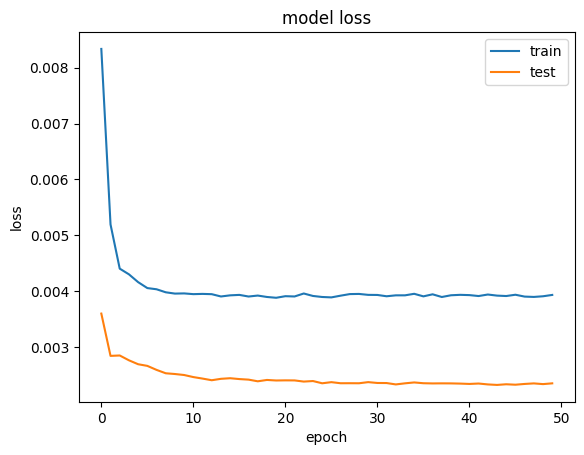

20588/20588 [==============================] - 42s 2ms/step
Test RMSE: 10.671


In [275]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting model.
history = model.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False) # Reducing less epochs to 50 and batchsize to 70.

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df2.shape[1]

# Prediction test
yhat = model.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# Inverting scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# Inverting  scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

- A test Root Mean Squared Error (RMSE) of 10.671 indicates the average magnitude of the errors between the actual and predicted values is approximately 10,671 steps. The RMSE is a common metric used to assess the performance of regression models, and a lower RMSE generally indicates better predictive accuracy.

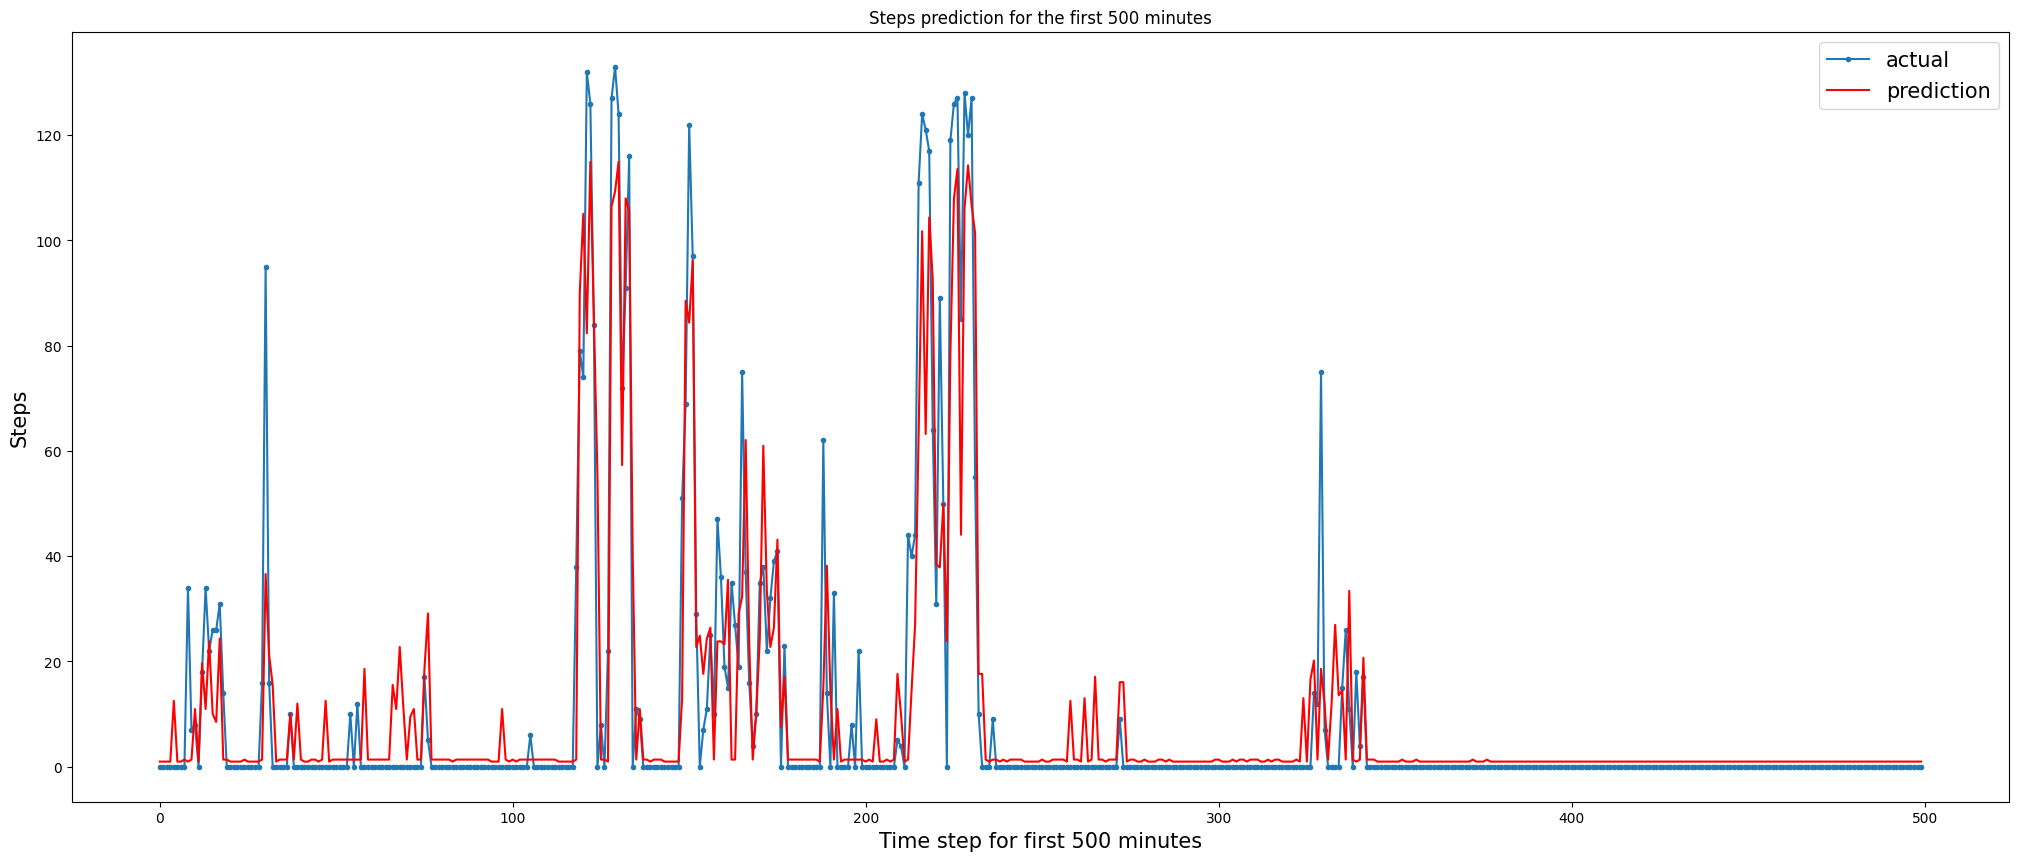

In [277]:
# Plotting Steps for the first 500 minutes.

aa=[x for x in range(500)]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y[:500], marker='.', label="actual")
plt.plot(aa, inv_yhat[:500], 'r', label="prediction")
plt.ylabel(df2.columns[0], size=15)
plt.xlabel('Time step for first 500 minutes', size=15)
plt.title('Steps prediction for the first 500 minutes')
plt.legend(fontsize=15)
plt.show()

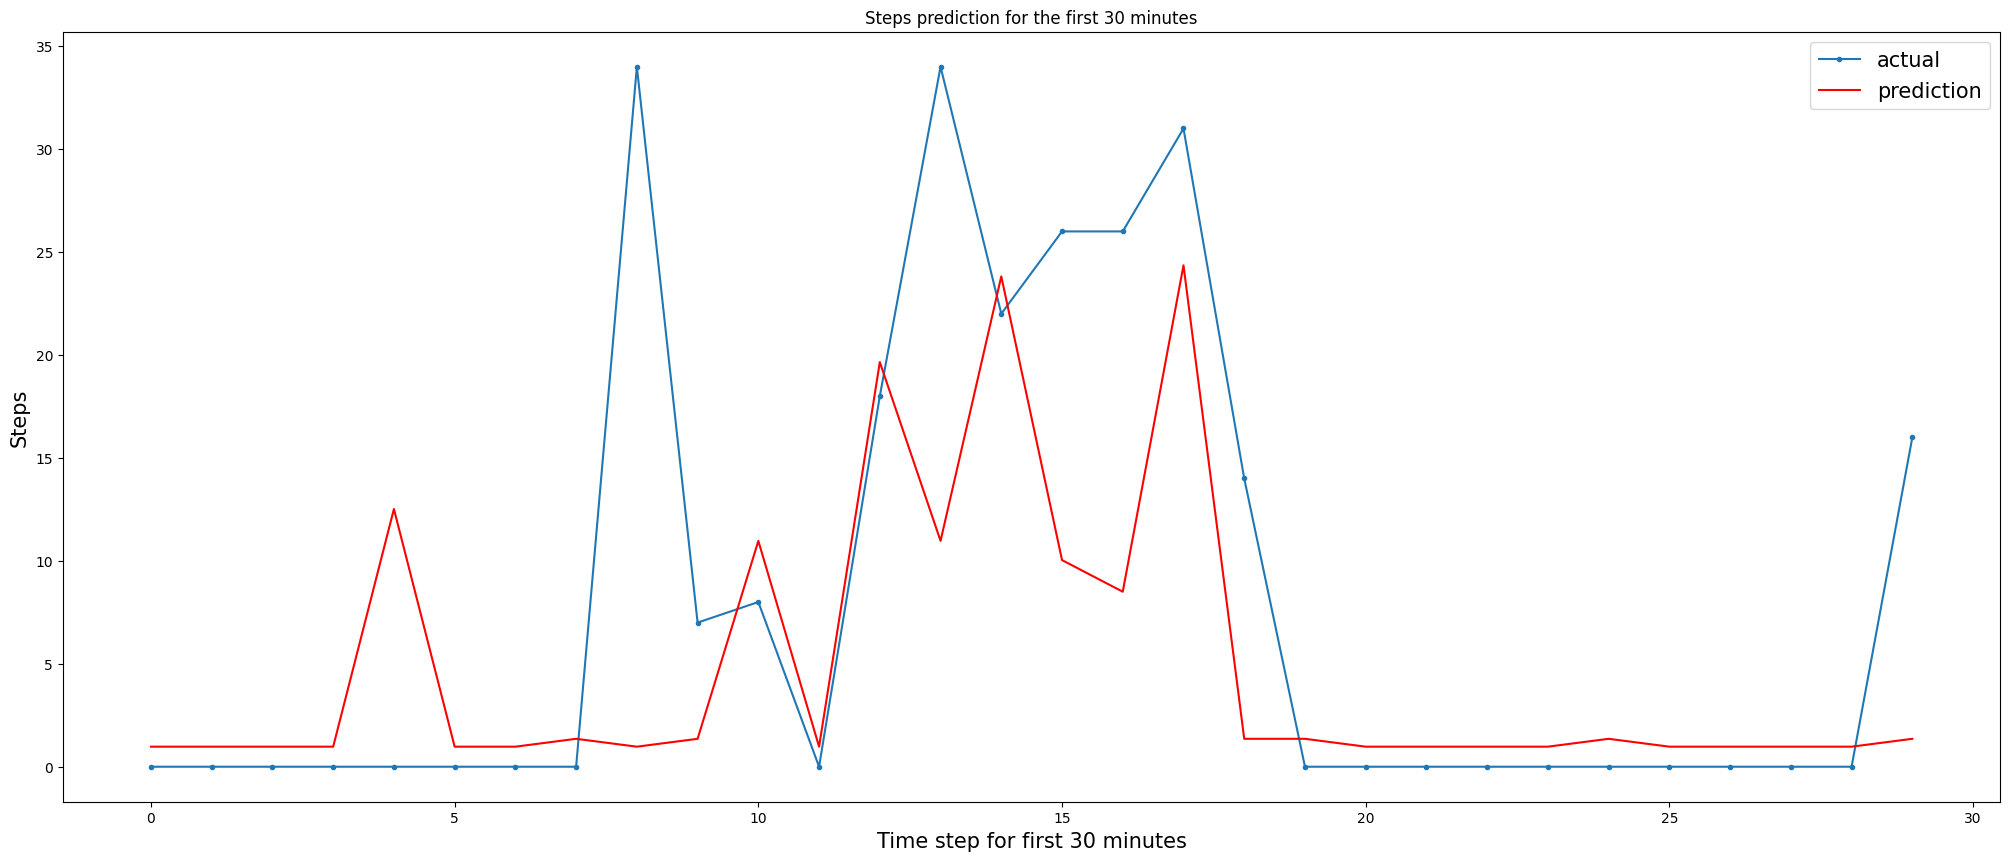

In [278]:
# Plotting Steps for the first 30 minutes.

aa=[x for x in range(30)]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y[:30], marker='.', label="actual")
plt.plot(aa, inv_yhat[:30], 'r', label="prediction")
plt.ylabel(df2.columns[0], size=15)
plt.xlabel('Time step for first 30 minutes', size=15)
plt.title('Steps prediction for the first 30 minutes')
plt.legend(fontsize=15)
plt.show()

In [281]:
# Calculating  R2 score
r2 = r2_score(inv_y, inv_yhat)

print(f'R2 Score: {r2:.3f}')

R2 Score: 0.652


A R2 score of 0.652 suggests that the model explains approxiamtely 65.2% of the variance in the "Steps" variable. We have to recall that R2 Score  ranges from 0 to 1, where closer to 1, represents stronger predictive power and closer to 0, represents a weaker predictive power.

In [284]:
# Repeating the same steps but this time predicting the Intensity activity against "Steps" and "Calories"
df3= complete_data_min[['Intensity', 'Steps','Calories']]

In [285]:
df3.shape

(1325580, 3)

In [286]:
# Splitting the data into: train and validation sets. Selecting 4000 data over 1325580 data to train, the rest will be used to test the model. values = df_resample.values

values = df3.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# Reshaping the data for time series forecasting
n_time_steps = 1
n_features = df3.shape[1]

reframed = np.zeros((scaled.shape[0] - n_time_steps + 1, n_time_steps, n_features))

for i in range(n_time_steps):
    reframed[:, i, :] = scaled[i:i - n_time_steps + scaled.shape[0] + 1]

# Reshape for training
reframed = reframed.reshape(-1, n_time_steps + 1, n_features)  # Adjusted here
n_train_time = 4000
train = reframed[:n_train_time, :]
test = reframed[n_train_time:, :]

# Separate features and target for training
train_x, train_y = train[:, :-1, :], train[:, -1, 0]
test_x, test_y = test[:, :-1, :], test[:, -1, 0]

In [287]:
print('train_x.shape',train_x.shape)
print('train_y.shape',train_y.shape)
print('test_x.shape',test_x.shape)
print('test_y.shape',test_y.shape)


train_x.shape (4000, 1, 3)
train_y.shape (4000,)
test_x.shape (658790, 1, 3)
test_y.shape (658790,)


Epoch 1/50
58/58 - 24s - loss: 0.0273 - val_loss: 0.0189 - 24s/epoch - 407ms/step
Epoch 2/50
58/58 - 19s - loss: 0.0192 - val_loss: 0.0133 - 19s/epoch - 325ms/step
Epoch 3/50
58/58 - 41s - loss: 0.0154 - val_loss: 0.0109 - 41s/epoch - 711ms/step
Epoch 4/50
58/58 - 21s - loss: 0.0143 - val_loss: 0.0103 - 21s/epoch - 366ms/step
Epoch 5/50
58/58 - 21s - loss: 0.0140 - val_loss: 0.0103 - 21s/epoch - 361ms/step
Epoch 6/50
58/58 - 19s - loss: 0.0141 - val_loss: 0.0102 - 19s/epoch - 329ms/step
Epoch 7/50
58/58 - 20s - loss: 0.0140 - val_loss: 0.0102 - 20s/epoch - 351ms/step
Epoch 8/50
58/58 - 19s - loss: 0.0141 - val_loss: 0.0102 - 19s/epoch - 325ms/step
Epoch 9/50
58/58 - 20s - loss: 0.0141 - val_loss: 0.0102 - 20s/epoch - 339ms/step
Epoch 10/50
58/58 - 21s - loss: 0.0140 - val_loss: 0.0102 - 21s/epoch - 361ms/step
Epoch 11/50
58/58 - 19s - loss: 0.0140 - val_loss: 0.0101 - 19s/epoch - 324ms/step
Epoch 12/50
58/58 - 20s - loss: 0.0140 - val_loss: 0.0101 - 20s/epoch - 349ms/step
Epoch 13/50
5

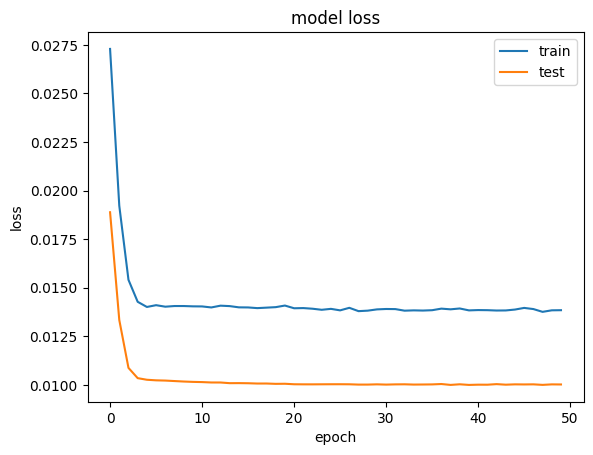

20588/20588 [==============================] - 43s 2ms/step
Test RMSE: 0.300


In [288]:
model_2 = Sequential()
model_2.add(LSTM(100, input_shape=(train_x.shape[1], train_x.shape[2])))
model_2.add(Dropout(0.1))
model_2.add(Dense(1))
model_2.compile(loss='mean_squared_error', optimizer='adam')

# Fitting model.
history = model_2.fit(train_x, train_y, epochs=50, batch_size=70, validation_data=(test_x, test_y), verbose=2, shuffle=False) # Reducing less epochs to 50 and batchsize to 70.

# Loss history plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

size = df3.shape[1]

# Prediction test
yhat = model_2.predict(test_x)
test_x = test_x.reshape((test_x.shape[0], size))

# Inverting scaling for prediction
inv_yhat = np.concatenate((yhat, test_x[:, 1-size:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# Inverting  scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_x[:, 1-size:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

# Calculating RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

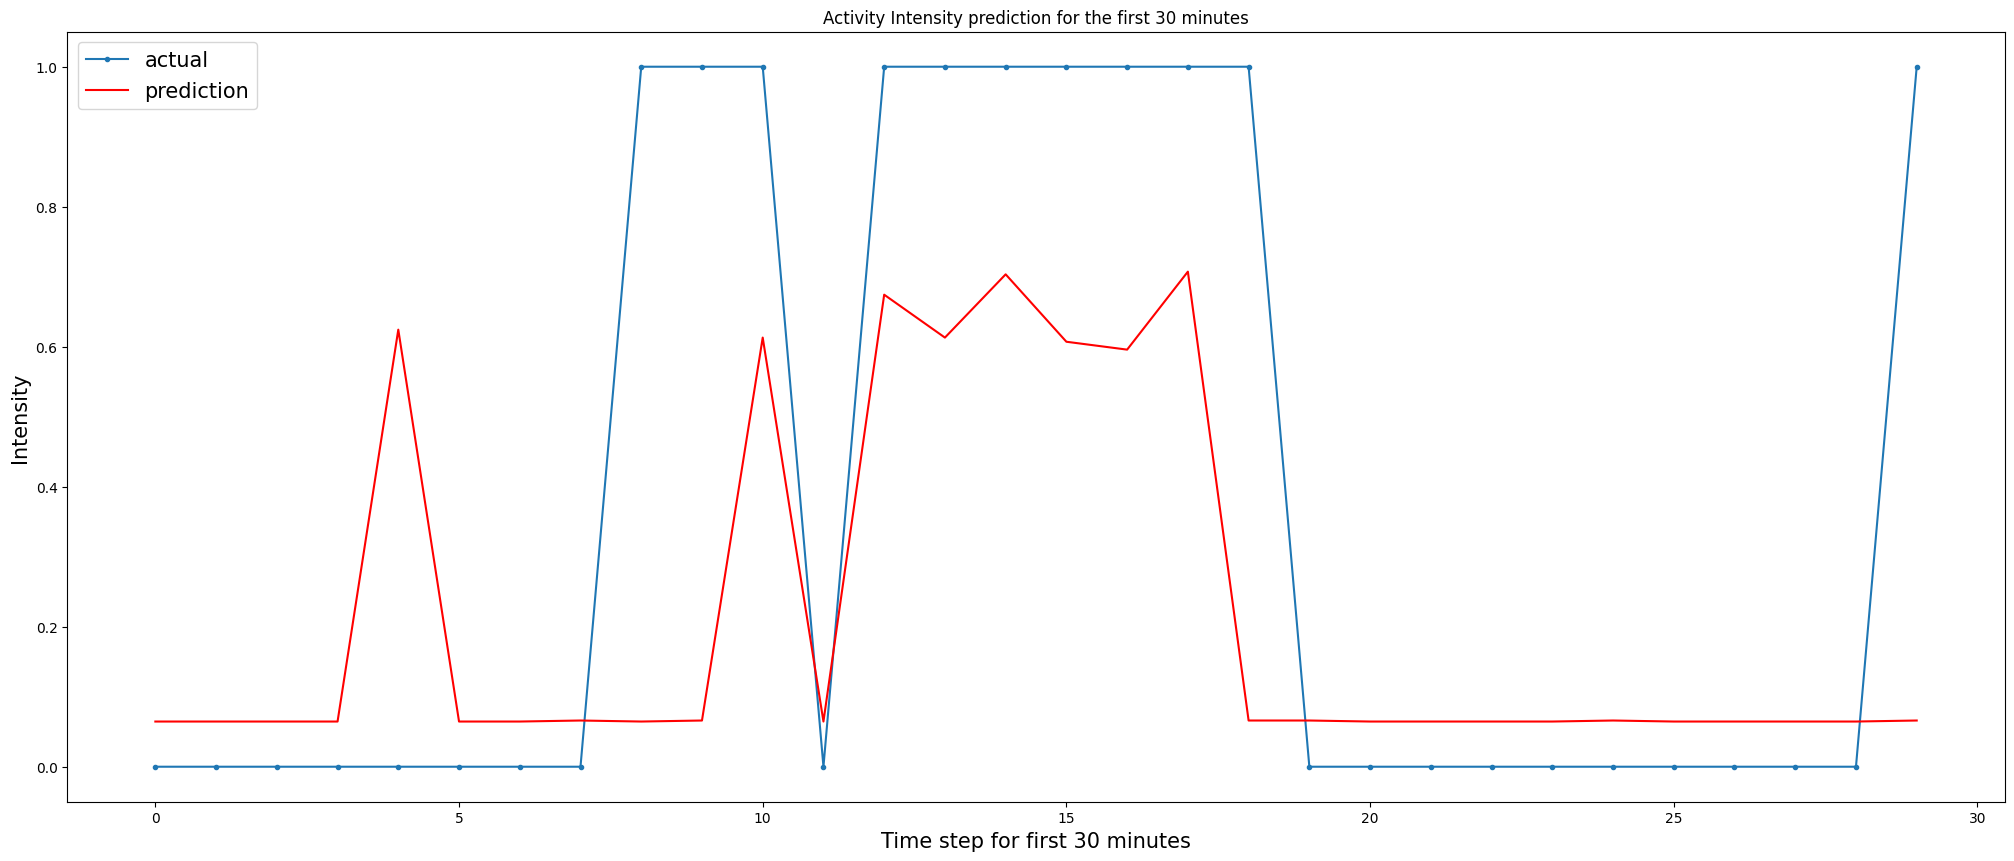

In [289]:
# Plotting Intensity Activities for the first 30 minutes.

aa=[x for x in range(30)]
plt.figure(figsize=(25,10))
plt.plot(aa, inv_y[:30], marker='.', label="actual")
plt.plot(aa, inv_yhat[:30], 'r', label="prediction")
plt.ylabel(df3.columns[0], size=15)
plt.xlabel('Time step for first 30 minutes', size=15)
plt.title('Activity Intensity prediction for the first 30 minutes')
plt.legend(fontsize=15)
plt.show()

In [290]:
# Calculating  R2 score
r2 = r2_score(inv_y, inv_yhat)

print(f'R2 Score: {r2:.3f}')

R2 Score: 0.665
